In [178]:
# perform knn
# written by naveen on 9/27/20

def knn_n(x_train,y_train,x_test,k):

    # find unique labels
    UN = np.unique(y_train)
    final_lbl = np.zeros((len(x_test),1))
    
    for i in range(len(x_test)):
        norm = np.zeros((len(x_train),1))
        for j in range(len(x_train)):
            norm[j] = np.linalg.norm(x_train[j,:]-x_test[i,:])

        a = np.argsort(norm,0)
        chosen_ind = a[0:k] 
        chosen_lbl = y_train[chosen_ind]

        temp = np.zeros((1,len(UN)))[0]

        for kk in range(k):
            temp[np.argwhere(UN==chosen_lbl[0])[0]]+=1
    
        if len(np.argwhere(temp == np.max(temp)))==1:
            ind = np.argmax(temp)
        else:
            ind = a[0]

        final_lbl[i] = UN[ind]
        #print(i)

    return final_lbl

In [ ]:
# import data and pre-process
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

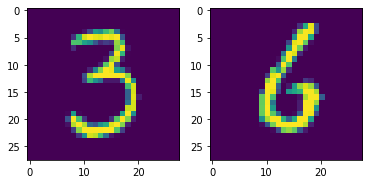

In [113]:
# visualization
num = 50
fig, ax = plt.subplots(1,2)
ax[0].imshow(np.reshape(x_train[num,:],(28,28)))
ax[1].imshow(np.reshape(x_test[num,:],(28,28)))

In [181]:
Y_TEST = knn_n(x_train,y_train,x_test[0:1000],3)

In [198]:
val = Y_TEST.flatten()-y_test[0:1000].flatten()
print("accuracy = ",100*len(np.argwhere((val) ==0))/len(Y_TEST),"%")

accuracy =  96.2 %
